<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/golden_cross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The golden cross is a bullish signal in which a  short-term moving average crosses above a long-term moving average. 

The golden cross is a bullish breakout pattern formed from a crossover involving a security's short-term moving average (such as the 15-day moving average) breaking above its long-term moving average (such as the 50-day moving average) or resistance level. 

As long-term indicators carry more weight, the golden cross indicates a bull market on the horizon and is reinforced by high trading volumes.

Author: chandan naik

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
#Load the dta
from google.colab import files
uploaded=files.upload()

Saving YESB Historical Data.csv to YESB Historical Data (1).csv


In [25]:
#store the data into a df
df = pd.read_csv('YESB Historical Data.csv')
#set the date to be the index
# df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 12, 2018",246.45,248.25,253.95,245.05,43.54M,2.60%
1,"Oct 11, 2018",240.20,222.00,268.95,216.65,94.68M,2.69%
2,"Oct 10, 2018",233.90,229.00,237.00,219.40,52.35M,4.12%
3,"Oct 09, 2018",224.65,225.50,233.80,222.60,49.48M,1.56%
4,"Oct 08, 2018",221.20,210.00,226.60,207.40,62.35M,7.38%
...,...,...,...,...,...,...,...
3281,"Jul 19, 2005",12.79,13.00,13.00,12.62,25.45M,-0.23%
3282,"Jul 18, 2005",12.82,12.54,13.14,12.50,75.68M,3.64%
3283,"Jul 15, 2005",12.37,11.25,12.89,11.25,75.45M,8.03%
3284,"Jul 14, 2005",11.45,12.00,12.00,11.40,16.28M,-2.47%


In [34]:
df['short'] =df.Price.ewm(span=50,adjust=False).mean()
df['long'] = df.Price.ewm(span=200,adjust=False).mean()

In [35]:
value = 1
df['short-long'] =  df['short'] - df['long']

In [36]:
#Create a function to signal when to buy adn sell and asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0,len(signal)):
    if signal['short-long'][i] > 0:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Price'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['short-long'][i] < 0:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Price'][i])
        flag = 0
      else:
        Sell.append(np.nan) 
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
    
  return (Buy,Sell)

In [37]:
#Create Buy and sell column
a = buy_sell(df)
df['buy'] = a[0]
df['sell'] = a[1]

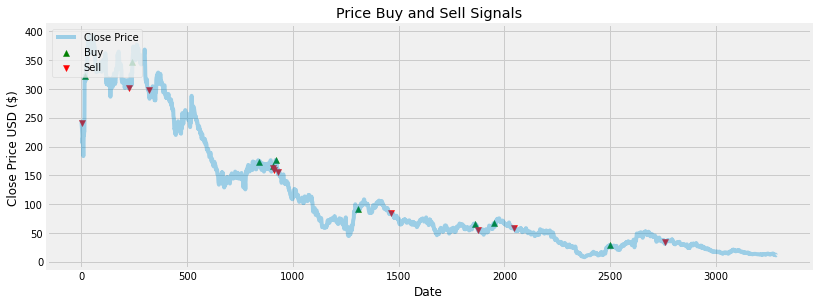

In [38]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['sell'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Price'],label='Close Price',alpha=0.35)
plt.title('Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($) ')
plt.legend(loc='upper left')
plt.show()

In [41]:
df

,Date,Price,Open,High,Low,Vol.,Change %,short,long,short-long,regime,buy,sell
0,"Oct 12, 2018",246.45,248.25,253.95,245.05,43.54M,2.60%,246.450000,246.450000,0.000000,0,NaN,NaN
1,"Oct 11, 2018",240.20,222.00,268.95,216.65,94.68M,2.69%,246.204902,246.387811,-0.182909,0,NaN,240.2
2,"Oct 10, 2018",233.90,229.00,237.00,219.40,52.35M,4.12%,245.722357,246.263554,-0.541197,0,NaN,NaN
3,"Oct 09, 2018",224.65,225.50,233.80,222.60,49.48M,1.56%,244.895990,246.048494,-1.152504,-1,NaN,NaN
4,"Oct 08, 2018",221.20,210.00,226.60,207.40,62.35M,7.38%,243.966735,245.801245,-1.834510,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,"Jul 19, 2005",12.79,13.00,13.00,12.62,25.45M,-0.23%,13.389520,15.134892,-1.745372,-1,NaN,NaN
3282,"Jul 18, 2005",12.82,12.54,13.14,12.50,75.68M,3.64%,13.367186,15.111858,-1.744672,-1,NaN,NaN
3283,"Jul 15, 2005",12.37,11.25,12.89,11.25,75.45M,8.03%,13.328080,15.084576,-1.756495,-1,NaN,NaN
3284,"Jul 14, 2005",11.45,12.00,12.00,11.40,16.28M,-2.47%,13.254430,15.048411,-1.793981,-1,NaN,NaN


In [ ]:
first_buy = df['buy'].first_valid_index()
last_sell = df['sell'].last_valid_index()
profit = 0
for i in range(first_buy, last_sell+1):
    if df['buy'][i] is not np.nan and df['sell'][i] is np.nan:
        profit -= float(df['buy'][i])
    elif df['buy'][i] is np.nan and df['sell'][i] is not np.nan:
        profit += float(df['sell'][i])
print("Profit is: ", profit)